In [1]:
%load_ext autoreload
%autoreload 2

import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
import numpy as np

from ott.geometry import pointcloud
from ott.problems.linear import linear_problem
from ott.solvers.linear import sinkhorn, sinkhorn_lr
from ott.tools import plot

from jax import config
import ott
print(ott.__version__)

config.update("jax_enable_x64", True)

def create_points(rng, n, m, d):
    rngs = jax.random.split(rng, 4)
    x = jax.random.normal(rngs[0], (n, d)) + 1
    y = jax.random.uniform(rngs[1], (m, d))
    a = jax.random.uniform(rngs[2], (n,))
    b = jax.random.uniform(rngs[3], (m,))
    a = a / jnp.sum(a)
    b = b / jnp.sum(b)
    return x, y, a, b


0.4.5.dev31+ge054ff6


In [2]:
rng = jax.random.PRNGKey(0)
n, m, d = 10_000, 15_000, 300
x, y, a, b = create_points(rng, n=n, m=m, d=d)

geom = pointcloud.PointCloud(x, y, epsilon=0.1)
ot_prob = linear_problem.LinearProblem(geom, a, b)

In [6]:
solver = sinkhorn_lr.LRSinkhorn(rank=200, initializer="rank2")
ot_lr = solver(ot_prob)

Text(0.5, 1.0, 'ott 0.4.3, init `rank2`')

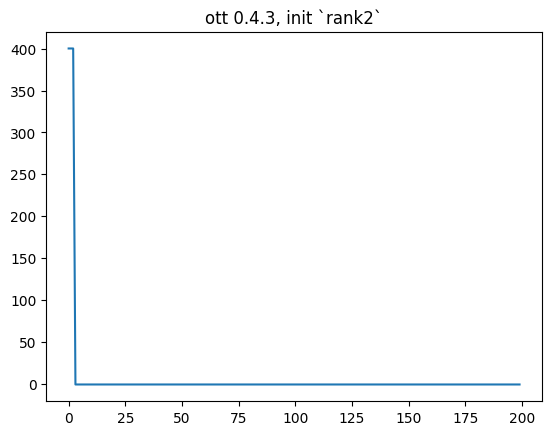

In [10]:
plt.plot(np.arange(len(ot_lr.costs)), ot_lr.costs)
plt.title("ott 0.4.3, init `rank2`")

Text(0.5, 1.0, 'ott 0.4.3, init `random`')

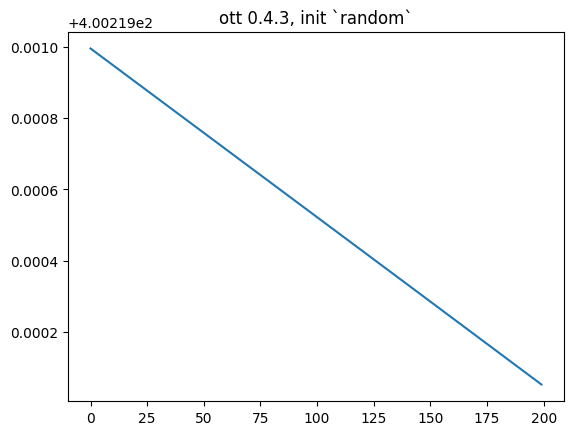

In [13]:
plt.plot(np.arange(len(ot_lr.costs)), ot_lr.costs)
plt.title("ott 0.4.3, init `random`")

Text(0.5, 1.0, 'ott 0.4.4, init `rank2`')

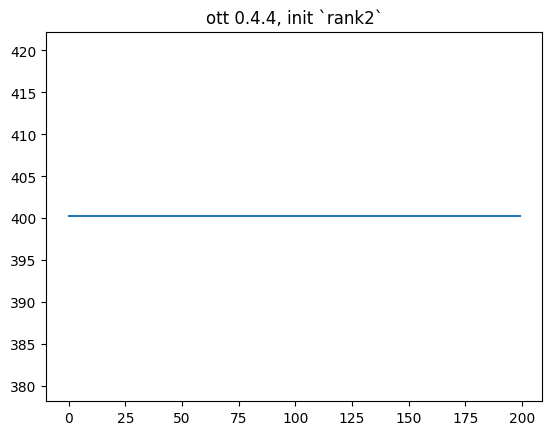

In [8]:
plt.plot(np.arange(len(ot_lr.costs)), ot_lr.costs)
plt.title("ott 0.4.4, init `rank2`")

Text(0.5, 1.0, 'ott 0.4.4, init `random`')

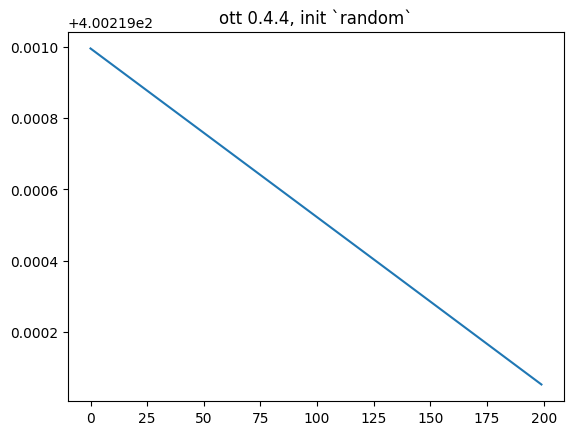

In [5]:
plt.plot(np.arange(len(ot_lr.costs)), ot_lr.costs)
plt.title("ott 0.4.4, init `random`")